## Simple Linear Regression

The given data have 4 variables and it's represending how much money spend on each platform for the advertisement for the product and how much sales the it leads to.

#### Steps to be Followed:
- Reading and Understading the data
- Training the model
- Residual Analysis
- Predicting and evaluating the test set

#### Step -1 : Reading and Understanding the data

1. Import the necessary librarires
2. load the data
3. understand the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('data/advertising.csv')

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


So, all the columns have non null values. We don't need to spend time on cleaning.

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


###### visualise the data

Scatterplot shows the relationship between the two variables. Let's plot it.

<AxesSubplot:xlabel='TV', ylabel='Sales'>

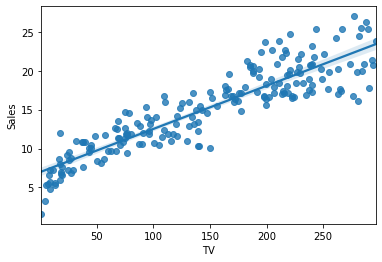

In [11]:
sns.regplot(x='TV',y='Sales',data=df)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

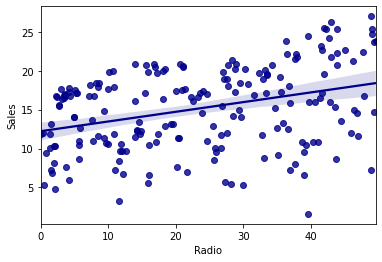

In [13]:
sns.regplot(x='Radio',y='Sales',data=df,color='darkblue')

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

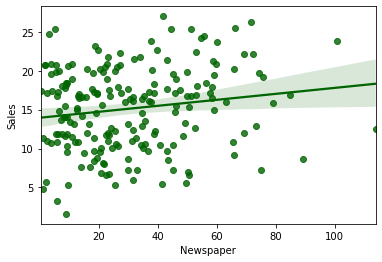

In [14]:
sns.regplot(x='Newspaper',y='Sales',data=df,color='darkgreen')

Instead of checking all the plots seperately, we can use pairplot.

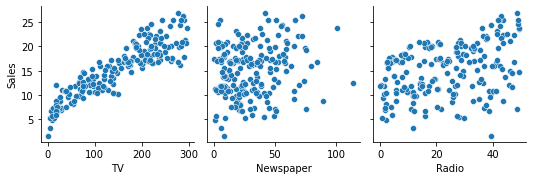

In [18]:
sns.pairplot(data=df , x_vars=['TV','Newspaper','Radio'], y_vars=['Sales'])

TV vs Sales looks like strong +ve connection.

In [20]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

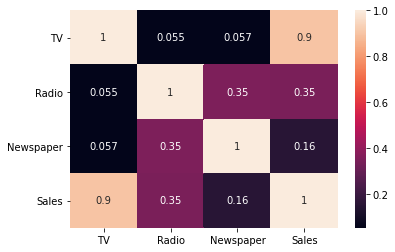

In [21]:
sns.heatmap(df.corr(),annot=True)

#### Understanding:
e read the data and visualised it using 'seaborn'. You also looked at the correlations between the target variable ‘Sales’ and the different predictor variables and saw that ‘TV’ has the strongest correlation with ‘Sales’. Sales and TV are linearly correlated. 

#### Step - 2: Performing Simple Linear Regression

Equation for linear regression $$ y = mx + c $$
* y is the dependent variable
* x is the independent variable
* m is the slope
* c is the intercept

In [25]:
import statsmodels
import statsmodels.api as sm
import sklearn

##### In our case

$$ y = c + m_1 \times TV $$

* The m values are called the model **coefficients** or **model parameters**.

**Steps:**
- Create x and y
- Create train and test sets (70-30, 80-20)
- Train your model on the training set (i.e. learn the coefficients)
- Evaluate the model (traing set, test set)

In [27]:
# create x and y
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [30]:
X = df['TV']

In [31]:
y = df['Sales']

In [33]:
#train-test split

from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test ,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=100)

In [35]:
X_train.shape

(140,)

In [38]:
X_test.shape

(60,)

In [41]:
y_train.shape

(140,)

In [44]:
#training the model

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [46]:
# fitting the model

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

So the model is $$ Sales = 6.9486 + 0.05 \times TV $$

In [47]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 02 Jan 2023   Prob (F-statistic):           1.52e-52
Time:                        22:13:11   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
y_train_pred = lr_model.predict(X_train_sm)

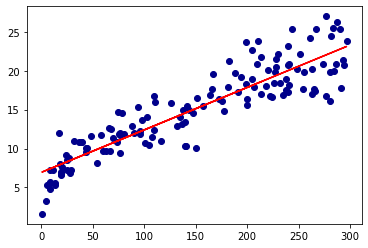

In [60]:
plt.scatter(X_train,y_train,color='darkblue')
plt.plot(X_train, y_train_pred,color='red')

#### Step-3: Residual Analysis

In [67]:
#residual
res = y_train - y_train_pred

Text(0.5, 1.0, 'Residual Plot')

<Figure size 432x288 with 0 Axes>

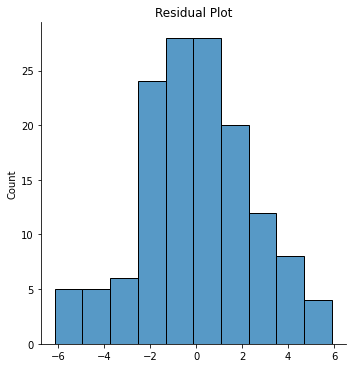

In [68]:
#plot
plt.figure()
sns.displot(res)
plt.title('Residual Plot')

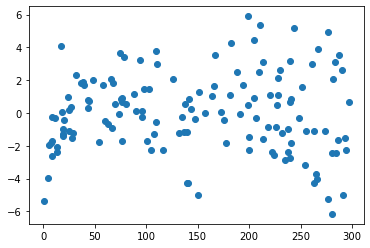

In [69]:
#look for patterns in residuals
plt.scatter(X_train,res)

#### Step - 4: Predictions and Evaluation on the test set

In [70]:
# make predictions on the test set (y_test_pred)
# evaluate the model, r-squared on the test

In [76]:
#add a const
X_test_sm = sm.add_constant(X_test)

#pred on the test
y_test_pred = lr_model.predict(X_test_sm)

In [103]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [81]:
#on test
r2 = r2_score(y_true = y_test, y_pred=y_test_pred)
r2

0.792103160124566

In [84]:
#on train
r2_score(y_true = y_train, y_pred= y_train_pred)

0.8157933136480389

In [86]:
#MSE

mean_squared_error(y_true = y_test, y_pred = y_test_pred)

4.077556371826953

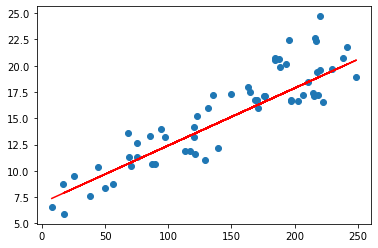

In [87]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')

## Linear Regression Using sklearn

In [92]:
#train,test split

X_train, X_test ,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=100)

In [98]:
# reshape X_train to (140,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [104]:
#steps in sklearn model building

# 1. create an object of linear regression
lm = LinearRegression()


# 2. fit the model
lm.fit(X_train_lm,y_train)

LinearRegression()

In [105]:
# see the params, make predictions (train, test)

print(lm.coef_)

[0.05454575]


In [107]:
print(lm.intercept_)

6.94868320000136


In [108]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [109]:
print(r2_score(y_train,y_train_pred))

0.8157933136480388


In [110]:
print(r2_score(y_test,y_test_pred))

0.792103160124566
